# Interviewing data sets

In this lesson we will be covering:

- how do I look at data?
- how do I select relevant parts of the dataset to answer my questions?
- how do I actually ask data questions?

After you got answer to one question, you want to follow up or ask another one. In this sense it is the same as talking to a person.

This is a *top - down* class. It will show you how you can apply programming skills as a journalist instead of teaching you the basics of programming.

Why Python and not Excel?

- Python is more **flexible**. This means not only you can do analysis faster, even automatize many parts of it.

- Sometimes you have to make sense of **large datasets** (milions of rows)

- You want to be ready to **repeat** your process if the raw data changes. Maybe it's the dataset is published regularly, or maybe an error is found in your original source.

- You want to be able to **identify every step** you took where you may have made an incorrect assumption, or where you'll need to defend your choices to your editor, or even a lawyer.

## Importing libraries and setting options

In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_info_columns", 150) #or "max_columns" will show you more columns if your dataset has many
%matplotlib inline

*Pandas* is a *Python* library. Using a specific library when programming makes you do less work as you don't need to write out everything what you want to do. The library functions do it for you.

## The dataset

first a dataset needs to be imported. Our dataset here is the [Global Terorism Database](https://www.start.umd.edu/gtd/).
> The Global Terrorism Database (GTD) an open-source database including information on terrorist events around the world from 1970 through 2015. The GTD includes systematic data on international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases

It is a quite big dataset containing more than 150,000 rows (one case per row) and 137 columns.

[Download the database](https://www.start.umd.edu/gtd/contact/)

### Step 1.) Look at the data and formulating questions

`dataset` will contain our data. We can give it any name really.
For more information on the individual columns have look at the [Codebook.pdf](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

In [2]:
dataset = pd.read_csv("globalterrorismdb_0616dist.csv")
dataset.head() #shows the first 5 rows of the dataset. ".head(10)" would show the first 10

/home/zufanka/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


What kind of questions could we pose to this data?

### Step 2.) Select relevant parts of the dataset and transform it as needed

This data set has too many columns. Depending on the questions we want to pose we want to select only a part of the columns. We are again going to name it `dataset`, but if we could also name it something else.

In [4]:
dataset = pd.read_csv("globalterrorismdb_0616dist.csv", usecols= ["iyear", "imonth", "country_txt", "region_txt",
                                                                 "city", "success", "attacktype1_txt", "targtype1_txt",
                                                                 "gname", "nkill", "nwound", "property"])
dataset.head()

,iyear,imonth,country_txt,region_txt,city,success,attacktype1_txt,targtype1_txt,gname,nkill,nwound,property
0,1970,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,Assassination,Private Citizens & Property,MANO-D,1.0,0.0,0
1,1970,0,Mexico,North America,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0,0.0,0
2,1970,1,Philippines,Southeast Asia,Unknown,1,Assassination,Journalists & Media,Unknown,1.0,0.0,0
3,1970,1,Greece,Western Europe,Athens,1,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN,1
4,1970,1,Japan,East Asia,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN,1


The column names. Let's rename them to be better readable.

In [5]:
dataset = dataset.rename(columns={
        'iyear': 'year',
        'imonth': 'month',
        'country_txt': 'country',
        'region_txt' : 'region',
        'attacktype1_txt' : 'attack_type',
        'targtype1_txt' : 'target',
        'gname' : 'group',
        'nkill' : 'killed',
        'nwound': 'wounded',
        'property' : 'property_damage'
    })

### Step 3) Ask questions

Let's first have a look on how complete is our data slice. You can see that most of the columns have `156772 non-null something`. We assume this is how many rows there are in the dataset.<br>
- `int64` is a whole number
- `float64` is a number with decimals
- `object` is a text

But some of them have less than 156772 entries.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156772 entries, 0 to 156771
Data columns (total 137 columns):
eventid               156772 non-null int64
iyear                 156772 non-null int64
imonth                156772 non-null int64
iday                  156772 non-null int64
approxdate            4756 non-null object
extended              156772 non-null int64
resolution            3502 non-null object
country               156772 non-null int64
country_txt           156772 non-null object
region                156772 non-null int64
region_txt            156772 non-null object
provstate             142252 non-null object
city                  156326 non-null object
latitude              152253 non-null float64
longitude             152253 non-null float64
specificity           156772 non-null int64
vicinity              156772 non-null int64
location              42211 non-null object
summary               90632 non-null object
crit1                 156772 non-null int64
cr

Let's see which and how many information we are missing

In [7]:
dataset.isnull().sum()

year                   0
month                  0
country                0
region                 0
city                 446
success                0
attack_type            0
target                 0
group                  0
killed              8945
wounded            14200
property_damage        0
dtype: int64

We can also chose a specific column and look for the missing data there

In [22]:
dataset["city"].isnull().sum()

446

... or more columns than one

In [21]:
dataset[["city","killed"]].isnull().sum()

city       446
killed    8945
dtype: int64

This is how we look at all the unique values in a column

In [23]:
dataset["target"].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

You probably first want to know what the data you are looking at looks like. This requires a bit of a training, but it's not hard to learn.

### simple statistics

In [10]:
dataset.describe()

/home/zufanka/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,month,success,killed,wounded,property_damage
count,156772.000000,156772.000000,156772.000000,147827.000000,142572.000000,156772.000000
mean,2000.474083,6.484666,0.903612,2.359237,3.089926,-0.434051
std,12.982397,3.392225,0.295124,11.421270,22.722313,3.031945
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1989.000000,4.000000,1.000000,NaN,NaN,0.000000
50%,2005.000000,6.000000,1.000000,NaN,NaN,1.000000
75%,2013.000000,9.000000,1.000000,NaN,NaN,1.000000
max,2015.000000,12.000000,1.000000,1500.000000,5500.000000,1.000000


Let's dive even further into the data and look at single different accidents with the functions `.sort_values()` and `.groupby()`. Can you guess what they do?

### `.sort_values()`
`.sort_values()` is meaningful for looking for TOP or BOTTOM numerical values (`float64` or `int64`)

#### questions:

- what is de TOP 10 of ... ?

**Q:** Which 10 accidents were the most fatal?

In [26]:
dataset.sort_values(by='killed', ascending=False).head(10)

,year,month,country,region,city,success,attack_type,target,group,killed,wounded,property_damage
133286,2014,6,Iraq,Middle East & North Africa,Tikrit,1,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1500.0,NaN,0
73055,2001,9,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,1381.5,NaN,1
73054,2001,9,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,1381.5,NaN,1
55858,1994,4,Rwanda,Sub-Saharan Africa,Gikoro,1,Armed Assault,Private Citizens & Property,Hutus,1180.0,0.0,1
132993,2014,6,Iraq,Middle East & North Africa,Badush,1,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670.0,0.0,1
76258,2004,3,Nepal,South Asia,Dhading district,1,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518.0,216.0,1
136503,2014,8,Syria,Middle East & North Africa,Unknown,1,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),517.0,NaN,1
136045,2014,8,Iraq,Middle East & North Africa,Sinjar,1,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),500.0,NaN,-9
6553,1978,8,Iran,Middle East & North Africa,Abadan,1,Facility/Infrastructure Attack,Business,Mujahedin-e Khalq (MEK),422.0,0.0,1
90276,2009,1,Democratic Republic of the Congo,Sub-Saharan Africa,Tora,1,Facility/Infrastructure Attack,Religious Figures/Institutions,Lord's Resistance Army (LRA),400.0,NaN,1


You can do the same with the `.nlargest()` function

In [14]:
dataset.nlargest(10, "killed")

,year,month,country,region,city,success,attack_type,target,group,killed,wounded,property_damage
133286,2014,6,Iraq,Middle East & North Africa,Tikrit,1,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1500.0,NaN,0
73054,2001,9,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,1381.5,NaN,1
73055,2001,9,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,1381.5,NaN,1
55858,1994,4,Rwanda,Sub-Saharan Africa,Gikoro,1,Armed Assault,Private Citizens & Property,Hutus,1180.0,0.0,1
132993,2014,6,Iraq,Middle East & North Africa,Badush,1,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670.0,0.0,1
76258,2004,3,Nepal,South Asia,Dhading district,1,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518.0,216.0,1
136503,2014,8,Syria,Middle East & North Africa,Unknown,1,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),517.0,NaN,1
136045,2014,8,Iraq,Middle East & North Africa,Sinjar,1,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),500.0,NaN,-9
6553,1978,8,Iran,Middle East & North Africa,Abadan,1,Facility/Infrastructure Attack,Business,Mujahedin-e Khalq (MEK),422.0,0.0,1
90276,2009,1,Democratic Republic of the Congo,Sub-Saharan Africa,Tora,1,Facility/Infrastructure Attack,Religious Figures/Institutions,Lord's Resistance Army (LRA),400.0,NaN,1


**Q:** Where in the most fatal accidents does Belgium stand?

We'll make a new variable (container) `most_fatal` and use the `.reset_index()` function. This will reset the first column (so-called `index`) to start from 0 again

In [88]:
most_fatal = dataset.sort_values(by='killed', ascending=False).reset_index()
most_fatal.head()

,index,year,month,country,region,city,success,attack_type,target,group,killed,wounded,property_damage
0,133286,2014,6,Iraq,Middle East & North Africa,Tikrit,1,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1500.0,NaN,0
1,73055,2001,9,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,1381.5,NaN,1
2,73054,2001,9,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,1381.5,NaN,1
3,55858,1994,4,Rwanda,Sub-Saharan Africa,Gikoro,1,Armed Assault,Private Citizens & Property,Hutus,1180.0,0.0,1
4,132993,2014,6,Iraq,Middle East & North Africa,Badush,1,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670.0,0.0,1


And we filter `Belgium` from the list.

In [87]:
most_fatal[most_fatal["country"] == "Belgium"].head() #head is optional

,index,year,month,country,region,city,success,attack_type,target,group,killed,wounded,property_damage
10942,26537,1985,11,Belgium,Western Europe,Aalst,1,Armed Assault,Business,Crazy Brabant Killers,7.0,3.0,1
17351,64858,1997,3,Belgium,Western Europe,Brussels,1,Armed Assault,Business,Unknown,4.0,0.0,1
18734,132125,2014,5,Belgium,Western Europe,Brussels,1,Armed Assault,Private Citizens & Property,Unaffiliated Individual(s),4.0,0.0,0
24522,14528,1981,10,Belgium,Western Europe,Antwerp,1,Bombing/Explosion,Religious Figures/Institutions,Unknown,3.0,95.0,1
33137,24807,1985,5,Belgium,Western Europe,Brussels,1,Bombing/Explosion,Private Citizens & Property,Communist Combattant Cells (CCC) (Belgium),2.0,12.0,1


### `.value_counts()`
`.value_counts()` is meaningful for counting types of categories (`object`) we have.

#### questions:

- How much ... are there in category ... ?

**Q:** who is most often target of an attack?

In [4]:
dataset["target"].value_counts()

KeyError: 'target'

Visualizing numbers makes interpretation a lot easier.

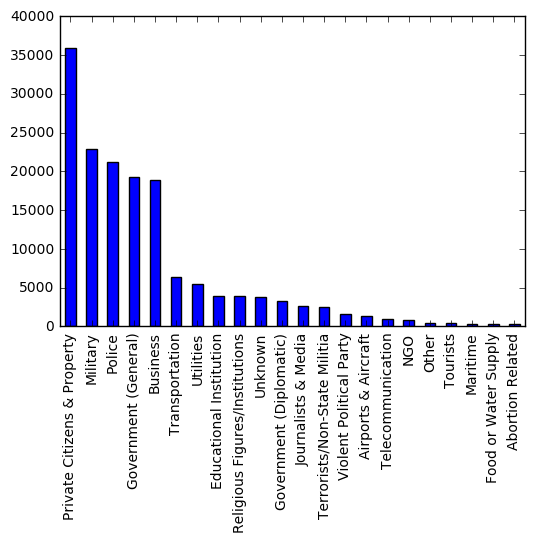

In [33]:
dataset["target"].value_counts().plot(kind="bar")

### `.groupby()`
`.groupby()` is meaningful for grouping categories (`object`). You can use different functions for the numeric values such as `.sum()`, `.count()`, `.mean()`, `.first()`, `.max()`, `.min()`, `.mode()`, `.median()`, ....

#### questions:

- How much is ... in category ... ?
- What is the mean of values in category ... ?

**Q:** What targets had the most casualties?

In [38]:
dataset.groupby("target").sum()["killed"].sort_values(ascending=False)

target
Private Citizens & Property       117262.870000
Military                           86367.680000
Police                             44541.345000
Government (General)               23324.845000
Business                           20065.710000
Transportation                     13156.060000
Religious Figures/Institutions     11690.159998
Terrorists/Non-State Militia        7373.670000
Airports & Aircraft                 3570.490000
Violent Political Party             3497.040000
Educational Institution             3417.160000
Unknown                             3392.340000
Government (Diplomatic)             2522.160000
Other                               2411.500000
Utilities                           1632.600000
Journalists & Media                 1325.170000
Maritime                            1139.200000
NGO                                  886.000000
Tourists                             716.000000
Food or Water Supply                 281.000000
Telecommunication                

This is logical given there most attacks on these targets. Let's have a look at the `mean` casualties per target instead of the `.sum`

In [110]:
dataset.groupby("target").mean()["killed"].sort_values(ascending=False)

target
Other                             5.556452
Maritime                          4.112635
Military                          4.112159
Private Citizens & Property       3.442125
Religious Figures/Institutions    3.095911
Airports & Aircraft               2.990360
Terrorists/Non-State Militia      2.980465
Violent Political Party           2.206334
Transportation                    2.181768
Police                            2.166092
Tourists                          1.785536
Government (General)              1.267792
Business                          1.150557
Food or Water Supply              1.097656
NGO                               1.096535
Unknown                           0.910207
Educational Institution           0.902578
Government (Diplomatic)           0.796639
Journalists & Media               0.540224
Utilities                         0.335788
Telecommunication                 0.202532
Abortion Related                  0.038760
Name: killed, dtype: float64

**Q:** Are the attacks getting more fatal?

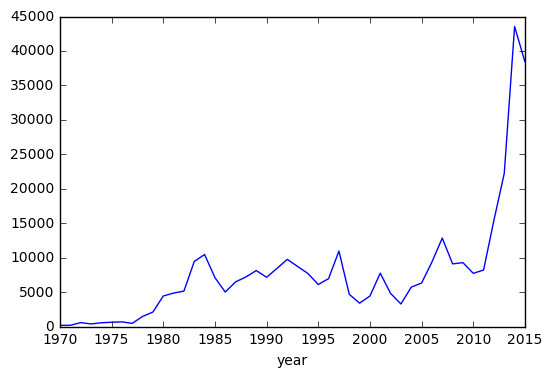

In [117]:
dataset.groupby("year").sum()["killed"].plot()

It seems like it.<br>
**Q:** But where do they happen most?

In [60]:
dataset.groupby("country").sum()["killed"].sort_values(ascending=False).head(20)

country
Iraq           58855.0
Afghanistan    27018.0
Pakistan       21597.0
Nigeria        18509.0
India          18317.0
Sri Lanka      15505.0
Colombia       14562.0
Peru           12752.0
El Salvador    12053.0
Algeria        11082.0
Nicaragua      10598.0
Syria          10363.0
Philippines     8645.0
Somalia         6695.0
Yemen           6495.0
Turkey          5659.0
Guatemala       5167.0
Russia          4182.0
Burundi         4108.0
Lebanon         4011.0
Name: killed, dtype: float64

We see that Iraq and Afghanistan get the most fatal attacks. But to filter out values (top 5 from the list above) and a column (`year` in this case) to plot this in time, we need to filter out these countries.

### `.loc()` and filtering columns

Let's say we would like to look at attacks where Journalists & Media were the target. This is the easier filtering where you get the see all the columns.

In [61]:
dataset[dataset["target"] == "Journalists & Media"].head()

,year,month,country,region,city,success,attack_type,target,group,killed,wounded,property_damage
2,1970,1,Philippines,Southeast Asia,Unknown,1,Assassination,Journalists & Media,Unknown,1.0,0.0,0
132,1970,3,Ethiopia,Sub-Saharan Africa,Unknown,1,Hostage Taking (Kidnapping),Journalists & Media,Eritrean Liberation Front,0.0,0.0,0
402,1970,7,United States,North America,Petaluma,1,Facility/Infrastructure Attack,Journalists & Media,Strikers,0.0,0.0,1
437,1970,7,Spain,Western Europe,Pamplona,1,Bombing/Explosion,Journalists & Media,GAC,NaN,NaN,1
509,1970,9,United States,North America,Madison,0,Facility/Infrastructure Attack,Journalists & Media,Right-Wing Extremists,0.0,0.0,0


Of course we can not make sense from such a big list. We need to ask a question and filter out only one column

**Q:** In which countries were journalists most often a target of an attack?

We use `.loc` in order to do this. First we do our filtering by `dataset["target"] == "Journalists & Media"` and afterwards we chose the column `country`.

In [62]:
dataset.loc[dataset["target"] == "Journalists & Media", "country"].value_counts().head(20)

Colombia         192
Peru             153
Iraq             150
Pakistan         149
El Salvador      128
Somalia           88
Philippines       88
Chile             83
Spain             74
Italy             74
Guatemala         72
Algeria           70
India             68
Lebanon           62
Libya             62
Afghanistan       60
Turkey            59
Syria             59
Yemen             57
United States     56
Name: country, dtype: int64

Let's plot it too!

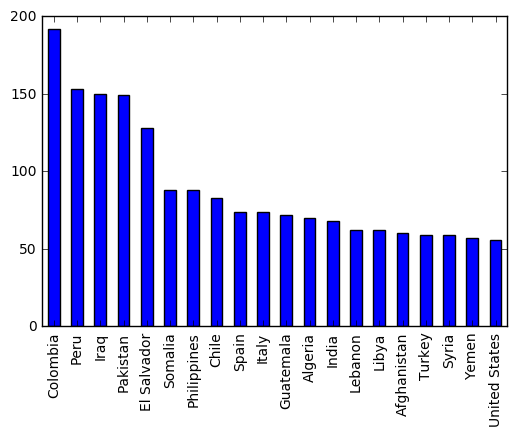

In [20]:
dataset.loc[dataset["target"] == "Journalists & Media", "country"].value_counts().head(20).plot(kind="bar")

Not the greatest country to be a journalist.<br>SO how about filtering more than one value, such as the 5 countries where most victims fall to terrorist attacks?

Instead of `==` we use function `.isin()`. Why? Well sometimes it is just to annoy you :) But don't worry. You can google all of this.

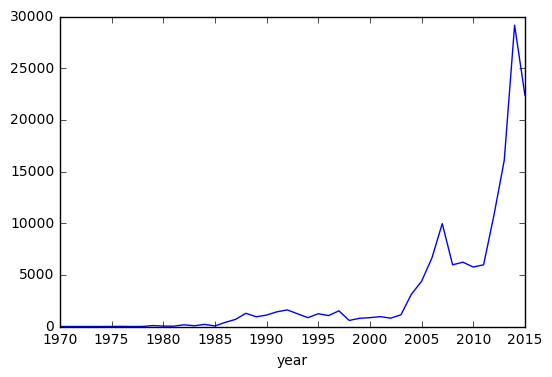

In [111]:
dataset[dataset["country"]
        .isin(["Iraq", "Afghanistan", "Pakistan", "Nigeria", "India"])].groupby(["year"]).sum()["killed"].plot()